# Projeto 2 - Análise Exploratória de Dados em Linguagem Python Para a Área de Varejo

Autor: Leonardo Simões

![Logo do Projeto](Projeto2.png)

In [1]:
# Verificação da versão do Python
from platform import python_version
print('Versão do Python: ', python_version())

Versão do Python:  3.11.2


In [2]:
# importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sbn

In [3]:
# Versões das bibliotecas mais usadas
print('Numpy versão ' + np.__version__)
print('Pandas versão ' + pd.__version__)
print('Matplotlib versão ' + mpl.__version__)
print('Seaborn versão ' + sbn.__version__)

Numpy versão 1.23.5
Pandas versão 2.0.0
Matplotlib versão 3.7.1
Seaborn versão 0.12.2


In [4]:
# Configuração de exibição de gráficos no notebook
%matplotlib inline

In [5]:
# Carregando dados e exibindo primeiras linhas
df = pd.read_csv('dataset.csv')
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [6]:
# Converte 'Data_Pedido' para o tipo data e cria outras colunas com informações da data
df['Data_Pedido'] = pd.to_datetime(df['Data_Pedido'], format='%d/%m/%Y')
df['Dia_Pedido'] = df['Data_Pedido'].dt.day
df['Mes_Pedido'] = df['Data_Pedido'].dt.month
df['Ano_Pedido'] = df['Data_Pedido'].dt.year
df['Mes_Ano_Pedido'] = df['Data_Pedido'].dt.to_period('M')

In [7]:
# Exibe informações gerais do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9700 entries, 0 to 9699
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID_Pedido       9700 non-null   object        
 1   Data_Pedido     9700 non-null   datetime64[ns]
 2   ID_Cliente      9700 non-null   object        
 3   Segmento        9700 non-null   object        
 4   Pais            9700 non-null   object        
 5   Cidade          9700 non-null   object        
 6   Estado          9700 non-null   object        
 7   ID_Produto      9700 non-null   object        
 8   Categoria       9700 non-null   object        
 9   SubCategoria    9700 non-null   object        
 10  Valor_Venda     9700 non-null   float64       
 11  Dia_Pedido      9700 non-null   int32         
 12  Mes_Pedido      9700 non-null   int32         
 13  Ano_Pedido      9700 non-null   int32         
 14  Mes_Ano_Pedido  9700 non-null   period[M]     
dtypes: d

In [8]:
# Verificando se o dataset não possui nenhum valor ausente
assert df.isna().sum().sum() == 0

In [9]:
# Verificando se o dataset não possui valores duplicados
assert df.duplicated().sum() == 0

In [10]:
# Descreve as colunas numéricas com estatísticas
df.describe()

,Data_Pedido,Valor_Venda,Dia_Pedido,Mes_Pedido,Ano_Pedido
count,9700,9700.000000,9700.000000,9700.000000,9700.000000
mean,2017-05-02 00:59:49.608247552,230.469892,15.455773,7.827423,2016.725773
min,2015-01-03 00:00:00,0.444000,1.000000,1.000000,2015.000000
25%,2016-05-26 00:00:00,17.248000,8.000000,5.000000,2016.000000
50%,2017-06-26 00:00:00,54.272000,15.000000,9.000000,2017.000000
75%,2018-05-18 00:00:00,209.932500,23.000000,11.000000,2018.000000
max,2018-12-30 00:00:00,22638.480000,31.000000,12.000000,2018.000000
std,NaN,627.504252,8.749366,3.277758,1.122672


In [11]:
# Exibe as dimensões do dataframe
print(f'O dataframe possui {df.shape[0]} linhas, {df.shape[1]} colunas e {df.size} células.')

O dataframe possui 9700 linhas, 15 colunas e 145500 células.


## Perguntas

1. Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?
2. Qual o Total de Vendas Por Data do Pedido? Demonstre o resultado através de um gráfico de barras.
3. Qual o Total de Vendas por Estado? Demonstre o resultado através de um gráfico de barras.
4. Quais São as 10 Cidades com Maior Total de Vendas? Demonstre o resultado através de um gráfico de barras.
5. Qual Segmento Teve o Maior Total de Vendas? Demonstre o resultado através de um gráfico de pizza.
6. Qual o Total de Vendas Por Segmento e Por Ano?
7. Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo: Se o Valor_Venda for maior que 1000 recebe 15% de desconto. Se o Valor_Venda for menor que 1000 recebe 10% de desconto. Quantas Vendas Receberiam 15% de Desconto?
8. Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?
9. Qual o Média de Vendas Por Segmento, Por Ano e Por Mês? Demonstre o resultado através de gráfico de linha.
10. Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? Demonstre tudo através de um único gráfico.

### 1. Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [12]:
# Filtra por Categoria de Office Supplies
df_office_supplies = df[df['Categoria'] == 'Office Supplies']

In [13]:
# Encontra a cidade de categoria de Office Supplies com maior valor venda
cidade_com_maior_valor_venda = df_office_supplies.groupby('Cidade')['Valor_Venda'].sum().sort_values(ascending=False).head(1)

In [14]:
# Exibe a resposta para a primeira pergunta
print(f'A cidade com maior Valor Venda de Produtos da Categoria "Office Supplies" é {cidade_com_maior_valor_venda.index[0]} com {round(cidade_com_maior_valor_venda.iloc[0], 2)} vendas.')

A cidade com maior Valor Venda de Produtos da Categoria "Office Supplies" é New York City com 68362.81 vendas.


### 2. Qual o Total de Vendas Por Data do Pedido? Demonstre o resultado através de um gráfico de linha.

In [15]:
# Calcula a soma do valor de vendas por data do pedido
df_vendas_data = df.groupby('Data_Pedido')['Valor_Venda'].sum().sort_index(ascending=True)
df_vendas_data.head()

Data_Pedido
2015-01-03      16.448
2015-01-04     288.060
2015-01-05      19.536
2015-01-06    4407.100
2015-01-07      87.158
Name: Valor_Venda, dtype: float64

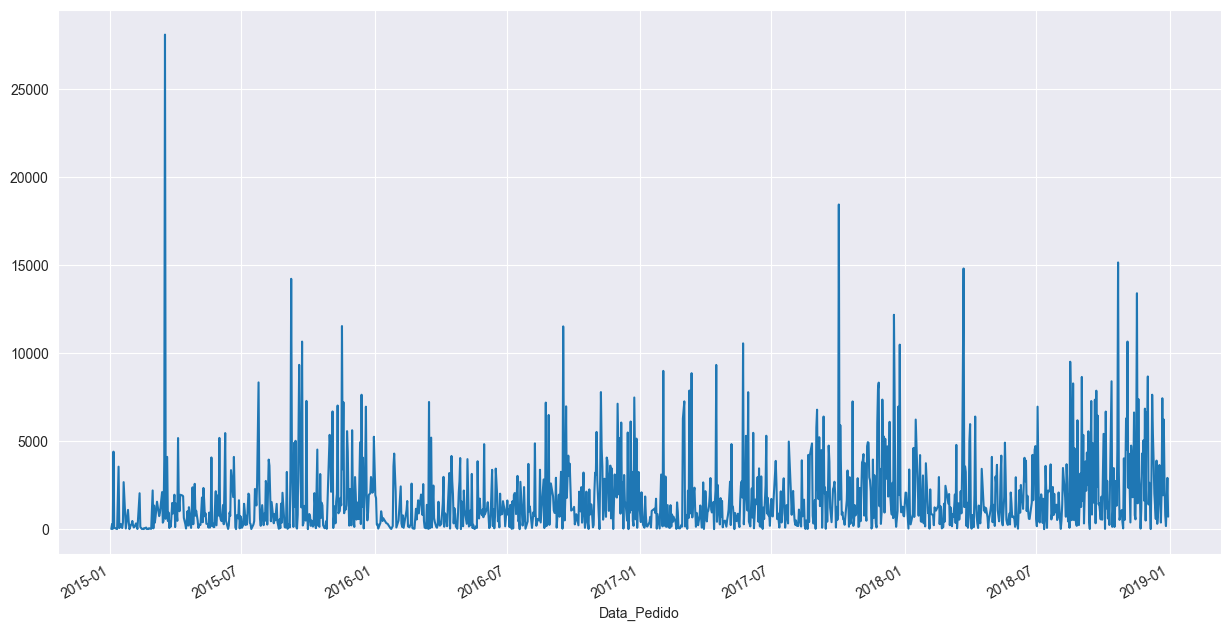

In [16]:
# Exibe um gráfico de linha para a soma do valor de vendas por data do pedido
plt.figure(figsize=(15,8))
df_vendas_data.plot.line()
plt.show()

### 3. Qual o Total de Vendas por Estado? Demonstre o resultado através de um gráfico de barras.

In [17]:
# Calcula a soma do valor de vendas por estado
df_vendas_estado = df.groupby('Estado')['Valor_Venda'].sum().sort_values(ascending=True)
df_vendas_estado.head()

Estado
North Dakota      919.910
West Virginia    1209.824
Maine            1270.530
South Dakota     1315.560
Wyoming          1603.136
Name: Valor_Venda, dtype: float64

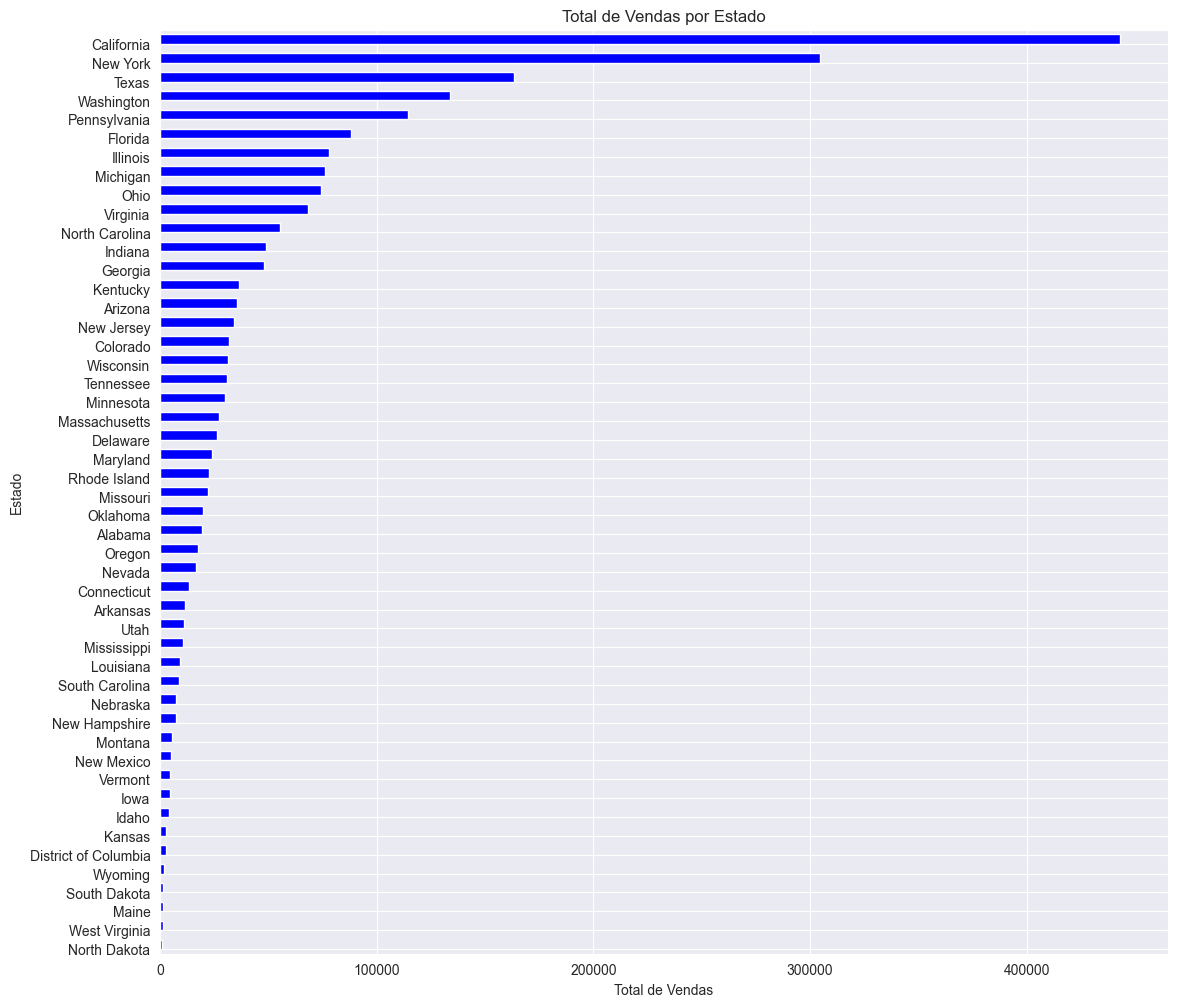

In [18]:
# Exibe um gráfico de barras horizontais para a soma do valor de vendas por estado
plt.figure(figsize=(13,12))
df_vendas_estado.plot(kind='barh', position=0, color='blue')
plt.title('Total de Vendas por Estado');
plt.xlabel('Total de Vendas');
plt.ylabel('Estado');
plt.show()

### 4. Quais São as 10 Cidades com Maior Total de Vendas? Demonstre o resultado através de um gráfico de barras.

In [19]:
# Calcula a 10 maiores somas do valor de vendas por cidade
df_vendas_10_cidades = df.groupby('Cidade')['Valor_Venda'].sum().sort_values(ascending=False).head(10)
df_vendas_10_cidades

Cidade
New York City    251749.2190
Los Angeles      171654.6330
Seattle          114725.4780
San Francisco    107489.9520
Philadelphia     107197.8030
Houston           61590.1868
San Diego         47458.3790
Chicago           46974.3430
Jacksonville      44713.1830
Detroit           42446.9440
Name: Valor_Venda, dtype: float64

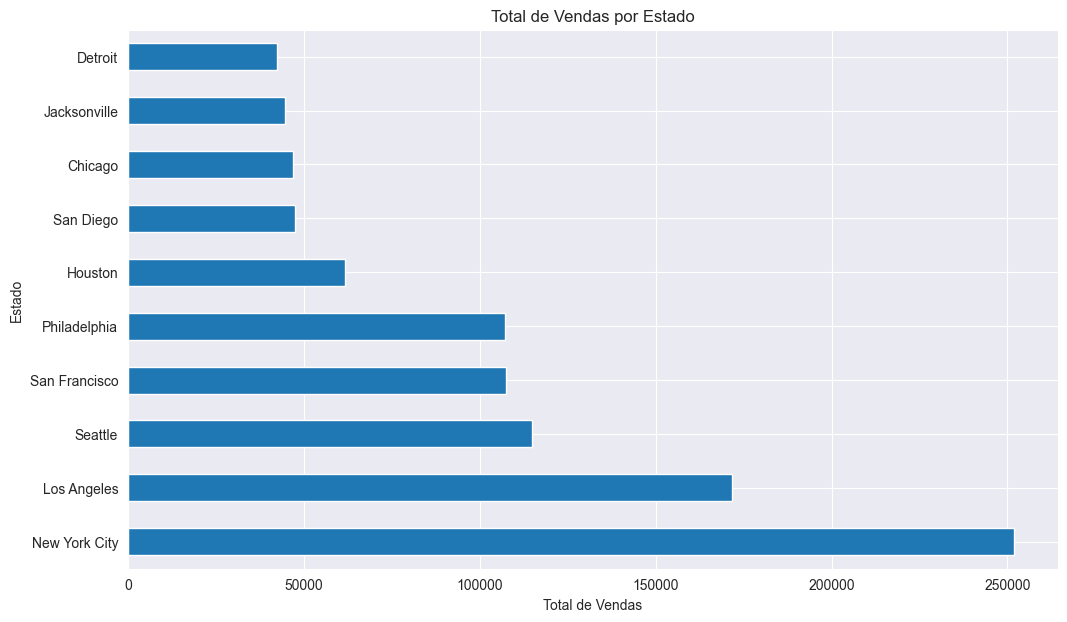

In [20]:
# Exibe um gráfico de barras horizontais para a 10 maiores somas do valor de vendas por cidade
plt.figure(figsize=(12,7))
df_vendas_10_cidades.plot.barh()
plt.title('Total de Vendas por Estado');
plt.xlabel('Total de Vendas');
plt.ylabel('Estado');
plt.show()

### 5. Qual Segmento Teve o Maior Total de Vendas? Demonstre o resultado através de um gráfico de pizza.

In [21]:
# Calcula a soma do valor de vendas por segmento
segmentos_total_vendas = df.groupby('Segmento')['Valor_Venda'].sum().sort_values(ascending=False)
segmentos_total_vendas

Segmento
Consumer       1.133834e+06
Corporate      6.792322e+05
Home Office    4.224914e+05
Name: Valor_Venda, dtype: float64

In [22]:
# Calcula o segmento com maior total de valor de venda
segmento_com_maior_total_vendas = segmentos_total_vendas.head(1)
segmento_com_maior_total_vendas

Segmento
Consumer    1133834.335
Name: Valor_Venda, dtype: float64

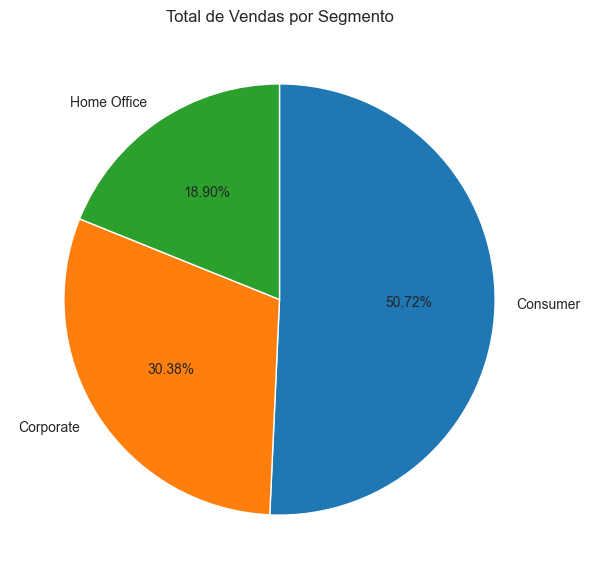

In [23]:
# Exibe um gráfico de pizza do total do valor de venda por segmento
fig, ax = plt.subplots(figsize=[11, 7])
ax.pie(segmentos_total_vendas, labels=segmentos_total_vendas.index, startangle=90, counterclock=False, autopct='%1.2f%%');
# ax.legend();
ax.set_title('Total de Vendas por Segmento');
plt.show()

In [24]:
# Exibe a resposta para a quinta pergunta
print(f'O segmento {segmento_com_maior_total_vendas.index[0]} teve o maior total de vendas, {round(segmento_com_maior_total_vendas.iloc[0],2)}.')

O segmento Consumer teve o maior total de vendas, 1133834.34.


### 6. Qual o Total de Vendas Por Segmento e Por Ano?

In [25]:
# Calcula e exibe a soma do valor de vendas por segmento e ano
df_vendas_segmentos_ano = df.groupby(by=['Segmento', 'Ano_Pedido'], as_index=False)['Valor_Venda'].sum().sort_values(by='Valor_Venda', ascending=False)
df_vendas_segmentos_ano

,Segmento,Ano_Pedido,Valor_Venda
3,Consumer,2018,323359.6019
2,Consumer,2017,288459.5572
1,Consumer,2016,265295.2593
0,Consumer,2015,256719.9166
7,Corporate,2018,235502.7284
6,Corporate,2017,203266.7398
11,Home Office,2018,156488.5849
4,Corporate,2015,125819.5957
5,Corporate,2016,114643.1229
10,Home Office,2017,103639.6270


### 7. Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo: Se o Valor_Venda for maior que 1000 recebe 15% de desconto. Se o Valor_Venda for menor que 1000 recebe 10% de desconto. Quantas Vendas Receberiam 15% de Desconto?

In [26]:
# Exibe a resposta para a pergunta 7
print(f"{df.query('Valor_Venda > 1000').shape[0]} vendas receberiam 15% de desconto.")

457 vendas receberiam 15% de desconto.


### 8. Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [27]:
# Cria coluna com o valor de 15% de desconto
tem_15_p_desconto = df['Valor_Venda'] > 1000
df.loc[tem_15_p_desconto, 'Desconto_Venda'] = df.loc[tem_15_p_desconto, 'Valor_Venda'] * 0.85

In [28]:
# Exibe a resposta para a pergunta 8
print(f"A média do Valor de Venda antes do desconto seria {round(df.loc[tem_15_p_desconto, 'Valor_Venda'].mean(), 2)}, e depois do desconto seria {round(df['Desconto_Venda'].mean(),2)}.")

A média do Valor de Venda antes do desconto seria 2116.81, e depois do desconto seria 1799.29.


### 9. Qual o Média de Vendas Por Segmento, Por Ano e Por Mês? Demonstre o resultado através de gráfico de linha.

In [29]:
df_vendas_segmentos_ano = df.groupby(by=['Segmento', 'Mes_Ano_Pedido'], as_index=False)['Valor_Venda'].mean()
df_vendas_segmentos_ano = df_vendas_segmentos_ano.sort_values(by=['Mes_Ano_Pedido'], ascending=True)
df_vendas_segmentos_ano

,Segmento,Mes_Ano_Pedido,Valor_Venda
0,Consumer,2015-01,146.736787
48,Corporate,2015-01,130.886769
96,Home Office,2015-01,329.855882
1,Consumer,2015-02,117.327926
49,Corporate,2015-02,69.235333
...,...,...,...
46,Consumer,2018-11,218.894183
94,Corporate,2018-11,341.215278
95,Corporate,2018-12,153.167403
47,Consumer,2018-12,183.616244


In [30]:
df_vendas_segmentos_ano['Mes_Ano_Pedido'] = df_vendas_segmentos_ano['Mes_Ano_Pedido'].astype(str)

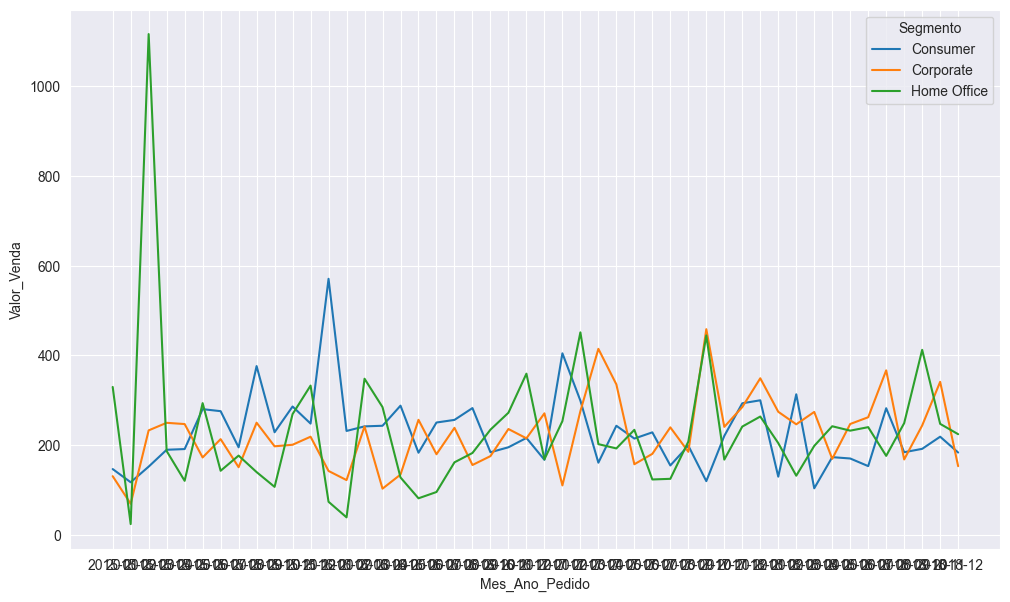

In [31]:
plt.figure(figsize=(12,7))
sbn.lineplot(data=df_vendas_segmentos_ano, x='Mes_Ano_Pedido', y='Valor_Venda', hue='Segmento');
plt.show()

### 10. Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? Demonstre tudo através de um único gráfico.

In [32]:
# Calcula a soma do valor de venda por categoria e subcategoria
df_vendas_cat_subcat = df.groupby(by=['Categoria', 'SubCategoria'], as_index=False)['Valor_Venda'].sum()

In [33]:
# Filtra para top 12 valores
df_vendas_cat_subcat  = df_vendas_cat_subcat.sort_values(by=['Valor_Venda'], ascending=False).head(12)
df_vendas_cat_subcat

,Categoria,SubCategoria,Valor_Venda
16,Technology,Phones,325271.2940
1,Furniture,Chairs,317919.6250
11,Office Supplies,Storage,216188.3620
3,Furniture,Tables,202083.3600
6,Office Supplies,Binders,194723.3810
15,Technology,Machines,189238.6310
13,Technology,Accessories,162791.3620
14,Technology,Copiers,146248.0940
0,Furniture,Bookcases,108045.0467
4,Office Supplies,Appliances,104061.6930


In [34]:
# Ordena pelo nomes das categorias
df_vendas_cat_subcat = df_vendas_cat_subcat.sort_values(by=['Categoria'])
df_vendas_cat_subcat

,Categoria,SubCategoria,Valor_Venda
1,Furniture,Chairs,317919.6250
3,Furniture,Tables,202083.3600
0,Furniture,Bookcases,108045.0467
2,Furniture,Furnishings,88862.7700
11,Office Supplies,Storage,216188.3620
6,Office Supplies,Binders,194723.3810
4,Office Supplies,Appliances,104061.6930
10,Office Supplies,Paper,76312.7640
16,Technology,Phones,325271.2940
15,Technology,Machines,189238.6310


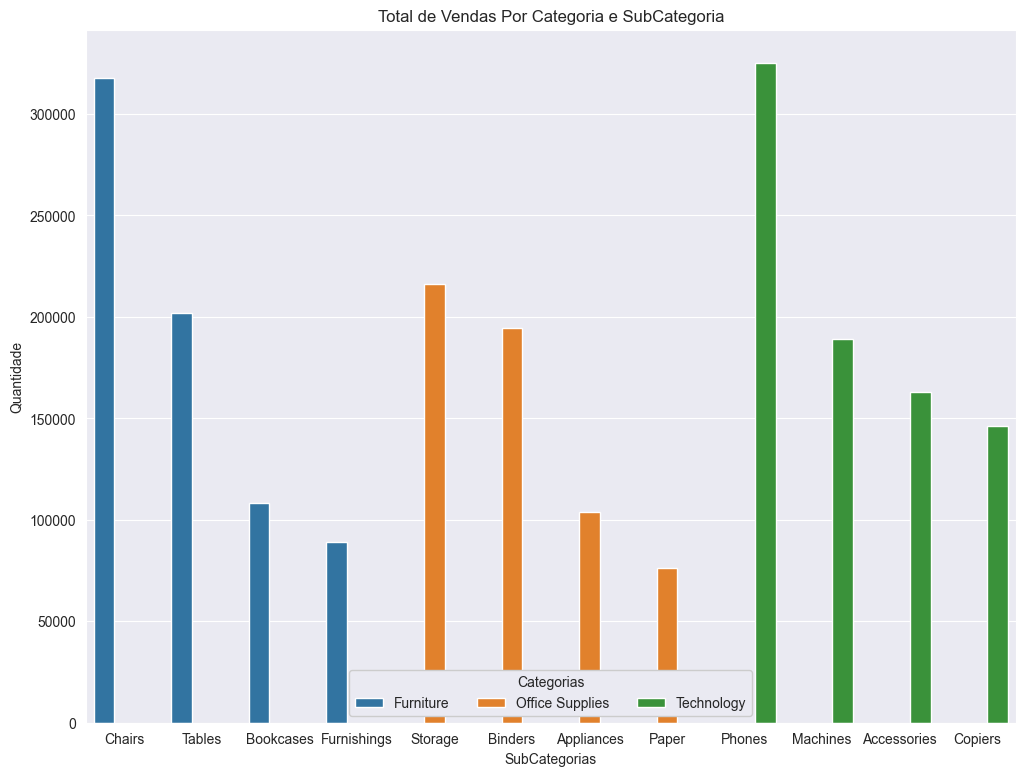

In [35]:
# Exibe um gráfico de barras agrupados
fig = plt.figure(figsize=(12, 9))
ax = sbn.barplot(x=df_vendas_cat_subcat['SubCategoria'], y=df_vendas_cat_subcat['Valor_Venda'], hue=df_vendas_cat_subcat['Categoria'])
ax.legend(loc=8, ncol=3, framealpha=1, title="Categorias")
ax.set_title('Total de Vendas Por Categoria e SubCategoria')
ax.set_ylabel('Quantidade')
ax.set_xlabel('SubCategorias');
plt.show()

## Referências

Fundamentos de Linguagem Python Para Análise de Dados e Data Science (Com ChatGPT):
https://www.datascienceacademy.com.br/course/fundamentos-de-linguagem-python-para-analise-de-dados-e-data-science, Acessado em 06/04/2023.